In [4]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 

In [5]:
# Specify the path to your CSV file
file = 'Resources/Alzheimer_s_Disease_and_Healthy_Aging_Data.csv'

# Read the CSV file into a DataFrame
Alzheimers_data = pd.read_csv(file)

Alzheimers_data.head()

,RowId,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,...,Stratification2,Geolocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2
0,BRFSS~2022~2022~42~Q03~TMC01~AGE~RACE,2022,2022,PA,Pennsylvania,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Native Am/Alaskan Native,POINT (-77.86070029 40.79373015),C05,TMC01,Q03,42,AGE,5064,RACE,NAA
1,BRFSS~2022~2022~46~Q03~TMC01~AGE~RACE,2022,2022,SD,South Dakota,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Asian/Pacific Islander,POINT (-100.3735306 44.35313005),C05,TMC01,Q03,46,AGE,65PLUS,RACE,ASN
2,BRFSS~2022~2022~16~Q03~TMC01~AGE~RACE,2022,2022,ID,Idaho,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,"Black, non-Hispanic",POINT (-114.36373 43.68263001),C05,TMC01,Q03,16,AGE,65PLUS,RACE,BLK
3,BRFSS~2022~2022~24~Q03~TMC01~AGE~RACE,2022,2022,MD,Maryland,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,"Black, non-Hispanic",POINT (-76.60926011 39.29058096),C05,TMC01,Q03,24,AGE,65PLUS,RACE,BLK
4,BRFSS~2022~2022~55~Q03~TMC01~AGE~GENDER,2022,2022,WI,Wisconsin,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Male,POINT (-89.81637074 44.39319117),C05,TMC01,Q03,55,AGE,65PLUS,GENDER,MALE


In [6]:
Alzheimers_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284142 entries, 0 to 284141
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   RowId                       284142 non-null  object 
 1   YearStart                   284142 non-null  int64  
 2   YearEnd                     284142 non-null  int64  
 3   LocationAbbr                284142 non-null  object 
 4   LocationDesc                284142 non-null  object 
 5   Datasource                  284142 non-null  object 
 6   Class                       284142 non-null  object 
 7   Topic                       284142 non-null  object 
 8   Question                    284142 non-null  object 
 9   Data_Value_Unit             284142 non-null  object 
 10  DataValueTypeID             284142 non-null  object 
 11  Data_Value_Type             284142 non-null  object 
 12  Data_Value                  192808 non-null  float64
 13  Data_Value_Alt

In [7]:

Alzheimers_data.drop(columns=["RowId","ClassID","TopicID","StratificationCategory1","StratificationID1","StratificationID2","StratificationCategory2","StratificationCategoryID1","StratificationCategoryID2", "LocationDesc","Question","Datasource","QuestionID", "LocationID","DataValueTypeID","Data_Value_Type","Data_Value_Alt","Data_Value_Footnote_Symbol","Data_Value_Footnote","High_Confidence_Limit","Low_Confidence_Limit"], inplace= True)

Alzheimers_data.head()


,YearStart,YearEnd,LocationAbbr,Class,Topic,Data_Value_Unit,Data_Value,Stratification1,Stratification2,Geolocation
0,2022,2022,PA,Mental Health,Frequent mental distress,%,NaN,50-64 years,Native Am/Alaskan Native,POINT (-77.86070029 40.79373015)
1,2022,2022,SD,Mental Health,Frequent mental distress,%,NaN,65 years or older,Asian/Pacific Islander,POINT (-100.3735306 44.35313005)
2,2022,2022,ID,Mental Health,Frequent mental distress,%,NaN,65 years or older,"Black, non-Hispanic",POINT (-114.36373 43.68263001)
3,2022,2022,MD,Mental Health,Frequent mental distress,%,9.0,65 years or older,"Black, non-Hispanic",POINT (-76.60926011 39.29058096)
4,2022,2022,WI,Mental Health,Frequent mental distress,%,5.6,65 years or older,Male,POINT (-89.81637074 44.39319117)


In [8]:
# drop NA values:

Alzheimers_data = Alzheimers_data.dropna()

Alzheimers_data.head()


,YearStart,YearEnd,LocationAbbr,Class,Topic,Data_Value_Unit,Data_Value,Stratification1,Stratification2,Geolocation
3,2022,2022,MD,Mental Health,Frequent mental distress,%,9.0,65 years or older,"Black, non-Hispanic",POINT (-76.60926011 39.29058096)
4,2022,2022,WI,Mental Health,Frequent mental distress,%,5.6,65 years or older,Male,POINT (-89.81637074 44.39319117)
6,2022,2022,OK,Mental Health,Frequent mental distress,%,21.5,Overall,Native Am/Alaskan Native,POINT (-97.52107021 35.47203136)
7,2022,2022,PA,Mental Health,Frequent mental distress,%,10.0,Overall,"White, non-Hispanic",POINT (-77.86070029 40.79373015)
8,2022,2022,PA,Overall Health,"Disability status, including sensory or mobili...",%,39.9,Overall,Female,POINT (-77.86070029 40.79373015)


In [9]:
# find unique Topics
unique_topics = Alzheimers_data['Class'].unique()

unique_topics

array(['Mental Health', 'Overall Health', 'Screenings and Vaccines',
       'Nutrition/Physical Activity/Obesity', 'Smoking and Alcohol Use',
       'Cognitive Decline', 'Caregiving'], dtype=object)

In [10]:
# filter DF by column "Class"

# Define the specific classes you want to keep
Filtered_class = ["Cognitive Decline"]

# Filter the DataFrame to only show the 'Class' column with certain classes
Alzheimers_data = Alzheimers_data[Alzheimers_data['Class'].isin(Filtered_class)]

Alzheimers_data.head()


,YearStart,YearEnd,LocationAbbr,Class,Topic,Data_Value_Unit,Data_Value,Stratification1,Stratification2,Geolocation
92,2022,2022,VA,Cognitive Decline,Talked with health care professional about sub...,%,51.4,50-64 years,Female,POINT (-78.45789046 37.54268067)
94,2022,2022,VT,Cognitive Decline,Talked with health care professional about sub...,%,54.4,Overall,Female,POINT (-72.51764079 43.62538124)
183,2019,2022,NY,Cognitive Decline,Subjective cognitive decline or memory loss am...,%,13.8,50-64 years,Hispanic,POINT (-75.54397043 42.82700103)
185,2019,2022,WA,Cognitive Decline,Subjective cognitive decline or memory loss am...,%,9.5,65 years or older,Female,POINT (-120.4700108 47.52227863)
186,2019,2022,WA,Cognitive Decline,Subjective cognitive decline or memory loss am...,%,9.3,65 years or older,Male,POINT (-120.4700108 47.52227863)


In [11]:
Alzheimers_data.rename(columns={'Data_Value': 'Data_Value(%)', 'Stratification1': 'Age Group', 'Stratification2': 'Gender/Race/Ethnicity'}, inplace=True)
Alzheimers_data.head()




,YearStart,YearEnd,LocationAbbr,Class,Topic,Data_Value_Unit,Data_Value(%),Age Group,Gender/Race/Ethnicity,Geolocation
92,2022,2022,VA,Cognitive Decline,Talked with health care professional about sub...,%,51.4,50-64 years,Female,POINT (-78.45789046 37.54268067)
94,2022,2022,VT,Cognitive Decline,Talked with health care professional about sub...,%,54.4,Overall,Female,POINT (-72.51764079 43.62538124)
183,2019,2022,NY,Cognitive Decline,Subjective cognitive decline or memory loss am...,%,13.8,50-64 years,Hispanic,POINT (-75.54397043 42.82700103)
185,2019,2022,WA,Cognitive Decline,Subjective cognitive decline or memory loss am...,%,9.5,65 years or older,Female,POINT (-120.4700108 47.52227863)
186,2019,2022,WA,Cognitive Decline,Subjective cognitive decline or memory loss am...,%,9.3,65 years or older,Male,POINT (-120.4700108 47.52227863)


In [12]:
# filtered_Alz_Data.drop(columns=["StratificationCategory1","StratificationCategory2","StratificationCategoryID1", "StratificationCategoryID2"], inplace= True)
# filtered_Alz_Data.head()

Alzheimers_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7480 entries, 92 to 284131
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   YearStart              7480 non-null   int64  
 1   YearEnd                7480 non-null   int64  
 2   LocationAbbr           7480 non-null   object 
 3   Class                  7480 non-null   object 
 4   Topic                  7480 non-null   object 
 5   Data_Value_Unit        7480 non-null   object 
 6   Data_Value(%)          7480 non-null   float64
 7   Age Group              7480 non-null   object 
 8   Gender/Race/Ethnicity  7480 non-null   object 
 9   Geolocation            7480 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 642.8+ KB


In [13]:
# Define the specific year you want to filter by
filtered_year = 2019

# Filter the DataFrame to only show rows where 'YearStart' equals the specified year
filtered_Alz_Data = Alzheimers_data[Alzheimers_data['YearStart'] == filtered_year]

# Display the first few rows of the filtered DataFrame
filtered_Alz_Data.head()

,YearStart,YearEnd,LocationAbbr,Class,Topic,Data_Value_Unit,Data_Value(%),Age Group,Gender/Race/Ethnicity,Geolocation
183,2019,2022,NY,Cognitive Decline,Subjective cognitive decline or memory loss am...,%,13.8,50-64 years,Hispanic,POINT (-75.54397043 42.82700103)
185,2019,2022,WA,Cognitive Decline,Subjective cognitive decline or memory loss am...,%,9.5,65 years or older,Female,POINT (-120.4700108 47.52227863)
186,2019,2022,WA,Cognitive Decline,Subjective cognitive decline or memory loss am...,%,9.3,65 years or older,Male,POINT (-120.4700108 47.52227863)
192,2019,2022,WA,Cognitive Decline,Need assistance with day-to-day activities bec...,%,22.1,Overall,Male,POINT (-120.4700108 47.52227863)
195,2019,2022,GA,Cognitive Decline,Talked with health care professional about sub...,%,36.5,65 years or older,"Black, non-Hispanic",POINT (-83.62758035 32.83968109)


In [14]:
filtered_Alz_Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2854 entries, 183 to 283976
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   YearStart              2854 non-null   int64  
 1   YearEnd                2854 non-null   int64  
 2   LocationAbbr           2854 non-null   object 
 3   Class                  2854 non-null   object 
 4   Topic                  2854 non-null   object 
 5   Data_Value_Unit        2854 non-null   object 
 6   Data_Value(%)          2854 non-null   float64
 7   Age Group              2854 non-null   object 
 8   Gender/Race/Ethnicity  2854 non-null   object 
 9   Geolocation            2854 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 245.3+ KB


In [15]:
filtered_Alz_Data.loc[:, ['Gender', 'Race/Ethnicity']] = filtered_Alz_Data['Gender/Race/Ethnicity'].str.split('/ ', expand=True)

filtered_Alz_Data.head()



,YearStart,YearEnd,LocationAbbr,Class,Topic,Data_Value_Unit,Data_Value(%),Age Group,Gender/Race/Ethnicity,Geolocation,Gender,Race/Ethnicity
183,2019,2022,NY,Cognitive Decline,Subjective cognitive decline or memory loss am...,%,13.8,50-64 years,Hispanic,POINT (-75.54397043 42.82700103),NaN,NaN
185,2019,2022,WA,Cognitive Decline,Subjective cognitive decline or memory loss am...,%,9.5,65 years or older,Female,POINT (-120.4700108 47.52227863),NaN,NaN
186,2019,2022,WA,Cognitive Decline,Subjective cognitive decline or memory loss am...,%,9.3,65 years or older,Male,POINT (-120.4700108 47.52227863),NaN,NaN
192,2019,2022,WA,Cognitive Decline,Need assistance with day-to-day activities bec...,%,22.1,Overall,Male,POINT (-120.4700108 47.52227863),NaN,NaN
195,2019,2022,GA,Cognitive Decline,Talked with health care professional about sub...,%,36.5,65 years or older,"Black, non-Hispanic",POINT (-83.62758035 32.83968109),NaN,NaN


In [16]:
# Define lists to hold filtered values
Gender = []
Race_Ethnicity = []


# Loop through the DataFrame and filter values based on criteria
for value in filtered_Alz_Data['Gender/Race/Ethnicity']:
    value = value
    
    # Append to the respective lists based on the criteria
    if value == 'Male':
        Gender.append(value)
    elif value == 'Female':
        Gender.append(value)
    
    if value == 'Asian':
        Race_Ethnicity.append(value)
    elif value == 'Hispanic':
        Race_Ethnicity.append(value)
    elif value == 'Black, non-Hispanic':
        Race_Ethnicity.append(value)
    elif value == 'White, non-Hispanic':
        Race_Ethnicity.append(value)
    elif value == 'Native Am/Alaskan Native':
        Race_Ethnicity.append(value)
    elif value == 'Asian/Pacific Islander':
        Race_Ethnicity.append(value)

# Print the filtered lists
print("Gender:", Gender)
print("R/E:", Race_Ethnicity)

Gender: ['Female', 'Male', 'Male', 'Male', 'Male', 'Female', 'Female', 'Female', 'Female', 'Male', 'Female', 'Male', 'Male', 'Male', 'Male', 'Male', 'Female', 'Female', 'Male', 'Male', 'Male', 'Male', 'Female', 'Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Male', 'Female', 'Female', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Female', 'Female', 'Male', 'Female', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Male', 'Male', 'Male', 'Female', 'Female', 'Female', 'Male', 'Male', 'Female', 'Male', 'Male', 'Male', 'Male', 'Male', 'Female', 'Male', 'Male', 'Male', 'Female', 'Male', 'Male', 'Female', 'Male', 'Male', 'Female', 'Male', 'Male', 'Male', 'Female', 'Male', 'Female', 'Male', 'Male', 'Male', 'Female', 'Female', 'Female', 'Female', 'Male', 'Female', 'Female', 'Female', 'Male', 'Female', 'Female', 'Female', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Female', 'Female', 'Female', 'Male', 'Male', 'Female', 'Male', 'Female

In [17]:
filtered_Alz_Data.dropna()

filtered_Alz_Data.head()

print(filtered_Alz_Data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2854 entries, 183 to 283976
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   YearStart              2854 non-null   int64  
 1   YearEnd                2854 non-null   int64  
 2   LocationAbbr           2854 non-null   object 
 3   Class                  2854 non-null   object 
 4   Topic                  2854 non-null   object 
 5   Data_Value_Unit        2854 non-null   object 
 6   Data_Value(%)          2854 non-null   float64
 7   Age Group              2854 non-null   object 
 8   Gender/Race/Ethnicity  2854 non-null   object 
 9   Geolocation            2854 non-null   object 
 10  Gender                 0 non-null      float64
 11  Race/Ethnicity         0 non-null      float64
dtypes: float64(3), int64(2), object(7)
memory usage: 289.9+ KB
None


In [18]:
print("Length of filtered_Alz_Data:", len(filtered_Alz_Data))
print("Length of Gender:", len(Gender))
print("Length of Race_Ethnicity:", len(Race_Ethnicity))


Length of filtered_Alz_Data: 2854
Length of Gender: 1783
Length of Race_Ethnicity: 1071


In [19]:
import pandas as pd
import numpy as np

# Assuming 'filtered_Alz_Data' is already your DataFrame
data = filtered_Alz_Data.copy()  # Make a copy to work with

# Define lists of known gender and race/ethnicity values
Gender = ['Male', 'Female']
Race_Ethnicity = ['White, non-Hispanic', 'Black, non-Hispanic', 'Asian/Pacific Islander', 'Hispanic', 'Native Am/Alaskan Native']

# Split values into Gender and Race/Ethnicity columns using conditions
data['Gender'] = data['Gender/Race/Ethnicity'].apply(lambda x: x if x in Gender else '--')
data['Race/Ethnicity'] = data['Gender/Race/Ethnicity'].apply(lambda x: x if x in Race_Ethnicity else '--')

data = data.drop(columns=['Gender/Race/Ethnicity'])

# Display the result
data.head()


,YearStart,YearEnd,LocationAbbr,Class,Topic,Data_Value_Unit,Data_Value(%),Age Group,Geolocation,Gender,Race/Ethnicity
183,2019,2022,NY,Cognitive Decline,Subjective cognitive decline or memory loss am...,%,13.8,50-64 years,POINT (-75.54397043 42.82700103),--,Hispanic
185,2019,2022,WA,Cognitive Decline,Subjective cognitive decline or memory loss am...,%,9.5,65 years or older,POINT (-120.4700108 47.52227863),Female,--
186,2019,2022,WA,Cognitive Decline,Subjective cognitive decline or memory loss am...,%,9.3,65 years or older,POINT (-120.4700108 47.52227863),Male,--
192,2019,2022,WA,Cognitive Decline,Need assistance with day-to-day activities bec...,%,22.1,Overall,POINT (-120.4700108 47.52227863),Male,--
195,2019,2022,GA,Cognitive Decline,Talked with health care professional about sub...,%,36.5,65 years or older,POINT (-83.62758035 32.83968109),--,"Black, non-Hispanic"


In [20]:
data = data.rename(columns={'YearStart': 'Year Start','YearEnd': 'Year End','LocationAbbr': 'State', 'Data_Value_Unit': 'Data Value Unit', 'Data_Value(%)': 'Data Value(%)', 'Race/Ethnicity': 'Race and Ethnicity'})
data.head()

,Year Start,Year End,State,Class,Topic,Data Value Unit,Data Value(%),Age Group,Geolocation,Gender,Race and Ethnicity
183,2019,2022,NY,Cognitive Decline,Subjective cognitive decline or memory loss am...,%,13.8,50-64 years,POINT (-75.54397043 42.82700103),--,Hispanic
185,2019,2022,WA,Cognitive Decline,Subjective cognitive decline or memory loss am...,%,9.5,65 years or older,POINT (-120.4700108 47.52227863),Female,--
186,2019,2022,WA,Cognitive Decline,Subjective cognitive decline or memory loss am...,%,9.3,65 years or older,POINT (-120.4700108 47.52227863),Male,--
192,2019,2022,WA,Cognitive Decline,Need assistance with day-to-day activities bec...,%,22.1,Overall,POINT (-120.4700108 47.52227863),Male,--
195,2019,2022,GA,Cognitive Decline,Talked with health care professional about sub...,%,36.5,65 years or older,POINT (-83.62758035 32.83968109),--,"Black, non-Hispanic"


In [21]:
# Remove the 'POINT (' and ')' from the 'Geolocation' column
data['Geolocation'] = data['Geolocation'].str.replace('POINT \(|\)', '', regex=True)

# Split the 'Geolocation' column into two new columns: 'longitude' and 'latitude'
data[['Longitude', 'Latitude']] = data['Geolocation'].str.split(' ', expand=True)

# Convert latitude and longitude to numeric
data['Longitude'] = pd.to_numeric(data['Longitude'], errors='coerce')
data['Latitude'] = pd.to_numeric(data['Latitude'], errors='coerce')



# Display the updated dataframe with the new columns
data.head()

,Year Start,Year End,State,Class,Topic,Data Value Unit,Data Value(%),Age Group,Geolocation,Gender,Race and Ethnicity,Longitude,Latitude
183,2019,2022,NY,Cognitive Decline,Subjective cognitive decline or memory loss am...,%,13.8,50-64 years,-75.54397043 42.82700103,--,Hispanic,-75.543970,42.827001
185,2019,2022,WA,Cognitive Decline,Subjective cognitive decline or memory loss am...,%,9.5,65 years or older,-120.4700108 47.52227863,Female,--,-120.470011,47.522279
186,2019,2022,WA,Cognitive Decline,Subjective cognitive decline or memory loss am...,%,9.3,65 years or older,-120.4700108 47.52227863,Male,--,-120.470011,47.522279
192,2019,2022,WA,Cognitive Decline,Need assistance with day-to-day activities bec...,%,22.1,Overall,-120.4700108 47.52227863,Male,--,-120.470011,47.522279
195,2019,2022,GA,Cognitive Decline,Talked with health care professional about sub...,%,36.5,65 years or older,-83.62758035 32.83968109,--,"Black, non-Hispanic",-83.627580,32.839681


In [22]:
data.to_csv('cleaned_data.csv', index=False)

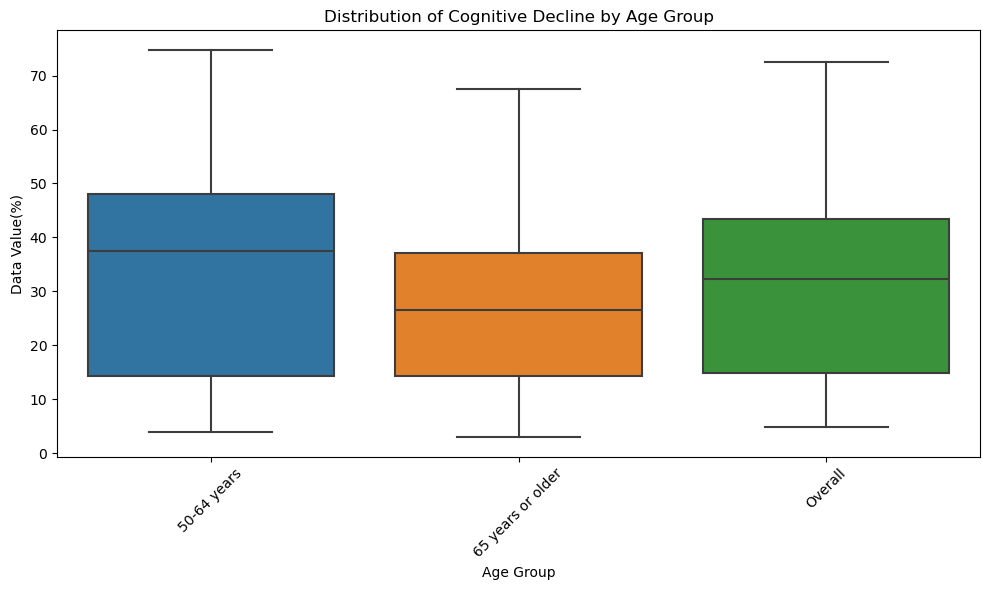

In [33]:
# Distribution of Cognitive Decline by Age Group
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age Group', y='Data Value(%)', data=data)
plt.title('Distribution of Cognitive Decline by Age Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

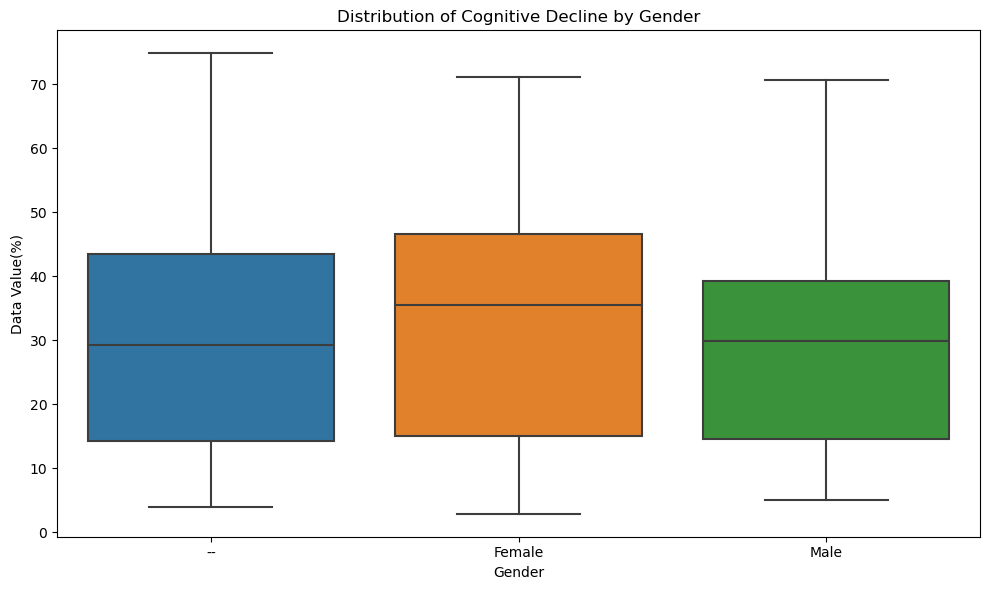

In [34]:
# Distribution of Cognitive Decline by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Data Value(%)', data=data)
plt.title('Distribution of Cognitive Decline by Gender')
plt.tight_layout()
plt.show()


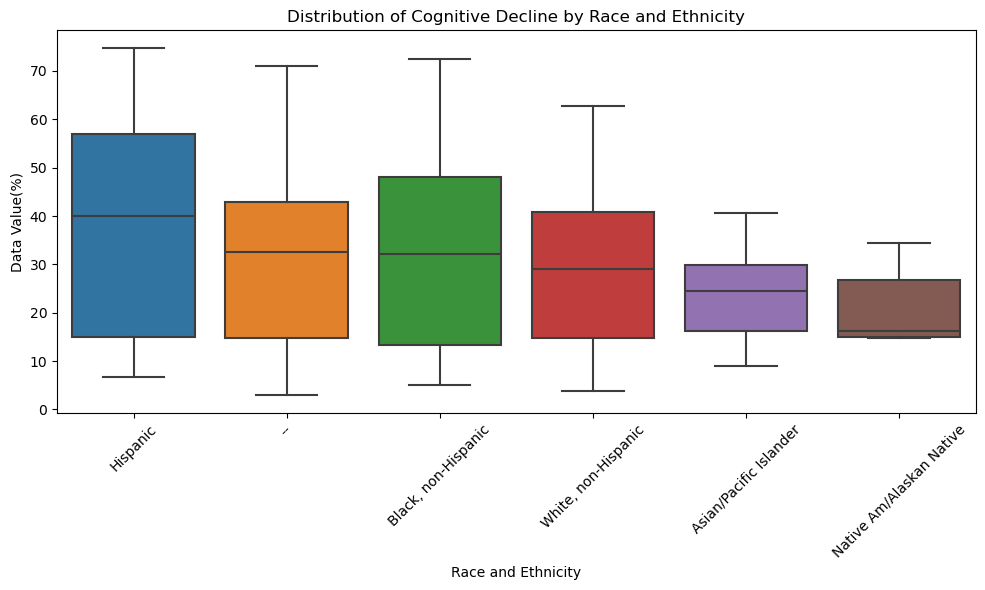

In [35]:
# Distribution of Cognitive Decline by Race and Ethnicity
plt.figure(figsize=(10, 6))
sns.boxplot(x='Race and Ethnicity', y='Data Value(%)', data=data)
plt.title('Distribution of Cognitive Decline by Race and Ethnicity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

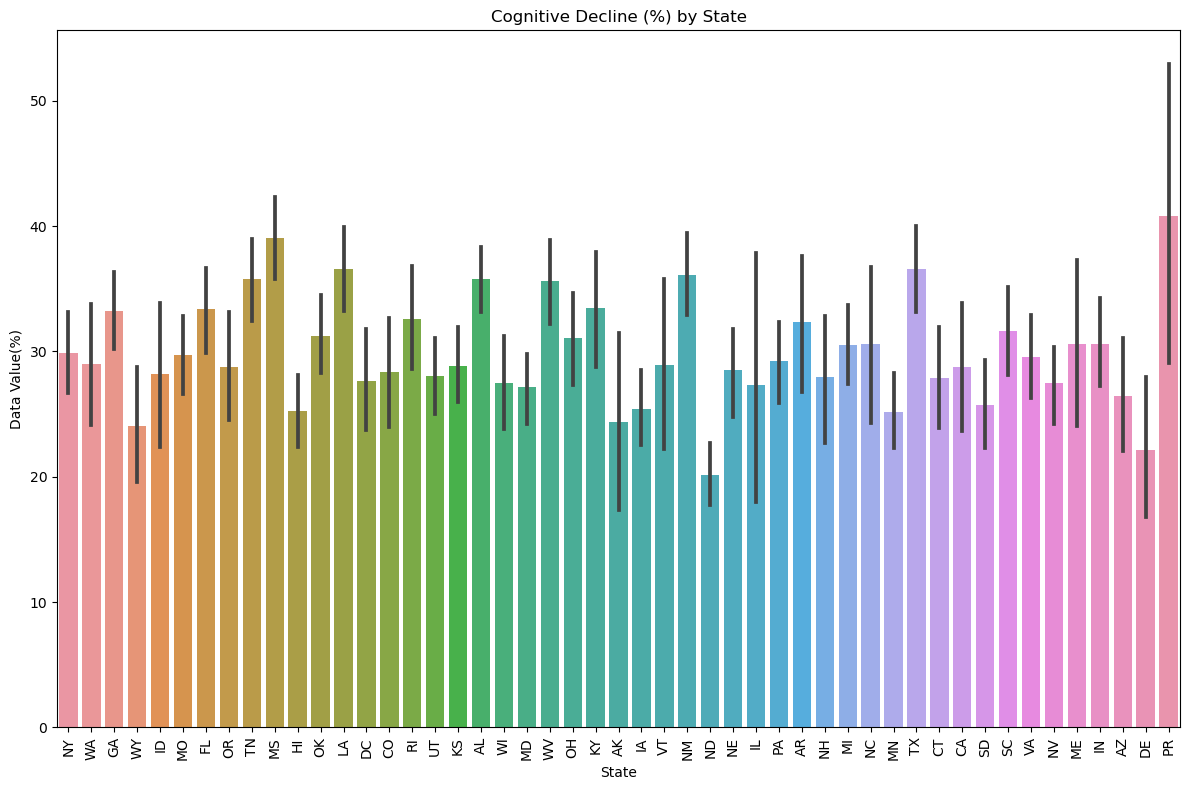

In [36]:
# Cognitive Decline (%) by State
plt.figure(figsize=(12, 8))
sns.barplot(x='State', y='Data Value(%)', data=data)
plt.title('Cognitive Decline (%) by State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [43]:
df = pd.DataFrame(data)
# Path to your SQLite database file
database_path = '/Users/ellengrant/Desktop/3/Project-3/starter code/ALZ.db'
Table_Name = 'Alz_Data_Table'
# Create a connection to the SQLite database
with sqlite3.connect(database_path) as connection:
  # Load the DataFrame to a SQL table
  df.to_sql(Table_Name, connection, if_exists='replace', index=False)
# Verify that the data has been loaded
with sqlite3.connect(database_path) as connection:
  df_from_sql = pd.read_sql('SELECT * FROM Alz_Data_Table', connection)
df_from_sql.head()

,Year Start,Year End,State,Class,Topic,Data Value Unit,Data Value(%),Age Group,Geolocation,Gender,Race and Ethnicity,Longitude,Latitude
0,2019,2022,NY,Cognitive Decline,Subjective cognitive decline or memory loss am...,%,13.8,50-64 years,-75.54397043 42.82700103,--,Hispanic,-75.543970,42.827001
1,2019,2022,WA,Cognitive Decline,Subjective cognitive decline or memory loss am...,%,9.5,65 years or older,-120.4700108 47.52227863,Female,--,-120.470011,47.522279
2,2019,2022,WA,Cognitive Decline,Subjective cognitive decline or memory loss am...,%,9.3,65 years or older,-120.4700108 47.52227863,Male,--,-120.470011,47.522279
3,2019,2022,WA,Cognitive Decline,Need assistance with day-to-day activities bec...,%,22.1,Overall,-120.4700108 47.52227863,Male,--,-120.470011,47.522279
4,2019,2022,GA,Cognitive Decline,Talked with health care professional about sub...,%,36.5,65 years or older,-83.62758035 32.83968109,--,"Black, non-Hispanic",-83.627580,32.839681


In [40]:
# Path to your SQLite database file
database_path = '/Users/ellengrant/Desktop/3/Project-3/starter code/ALZ.db' # Replace with your database path
# Create a connection to the SQLite database
with sqlite3.connect(database_path) as connection:
  # Define your SQL query to retrieve data
 query = """
SELECT * FROM Alz_Data_Table
WHERE Gender = 'Male'
AND State IN ('GA', 'TN', 'AL', 'SC', 'MS')
AND "Year Start" = 2019 AND "Year End" = 2022
AND ("Age Group" = 'Overall' OR "Age Group" = '50-64 years')
"""
# -- query = """
# SELECT * FROM Alz_Data_Table
# WHERE ("Age Group" = 'Overall' OR "Age Group" = '50-64 years')
# AND "Race/Ethnicity" = 'Black, non-Hispanic'
# """
  # Execute the query and load the results into a DataFrame
df_from_sql = pd.read_sql(query, connection)
# Display the results
df_from_sql.head()

,Year Start,Year End,State,Class,Topic,Data Value Unit,Data Value(%),Age Group,Geolocation,Gender,Race and Ethnicity,Longitude,Latitude
0,2019,2022,MS,Cognitive Decline,Functional difficulties associated with subjec...,%,51.2,50-64 years,-89.53803082 32.7455101,Male,--,-89.538031,32.745510
1,2019,2022,GA,Cognitive Decline,Need assistance with day-to-day activities bec...,%,48.0,50-64 years,-83.62758035 32.83968109,Male,--,-83.627580,32.839681
2,2019,2022,SC,Cognitive Decline,Functional difficulties associated with subjec...,%,34.3,Overall,-81.04537121 33.9988213,Male,--,-81.045371,33.998821
3,2019,2022,GA,Cognitive Decline,Subjective cognitive decline or memory loss am...,%,13.6,Overall,-83.62758035 32.83968109,Male,--,-83.627580,32.839681
4,2019,2022,AL,Cognitive Decline,Need assistance with day-to-day activities bec...,%,43.4,50-64 years,-86.63186076 32.84057112,Male,--,-86.631861,32.840571
